In [1]:
from ensemble import *

In [3]:
df = pd.read_pickle('merged_grammar.pkl')
e = ensemble(df)

In [6]:
df.head()

,users,link_karma,comment_karma,verified,mod,gold,days_old,comments,total_comments,positive,...,mode_comment_length,median_comment_length,duplicate_comments,is_scammer,comments_new,grammar,cap_freq,avg_grammar,total_grammar,cap_freq_mean
0,Pellijak,1,-7,False,False,False,2991,"[Hello Guys,\nMy friend made a paste with trus...",20,0.750000,...,224,224.0,10,True,"Hello Guys,\nMy friend made a paste with trust...","(5.0, 100)","[0.03125, 0.03125, 0.03125, 0.03125, 0.03125, ...",5.000000,100,0.029018
1,holaquetal12,1,19,True,False,False,810,"[Same here, Damn..., She sent me a text messag...",13,0.692308,...,9,57.0,0,True,Same here Damn... She sent me a text message t...,"(0.6153846153846154, 8)","[0.1111111111111111, 0.14285714285714285, 0.02...",0.615385,8,0.069973
2,CalmingTingles,10,42,True,False,False,1294,"[My thoughts exactly , This guy is so toxic, h...",30,0.233333,...,753,204.5,1,True,"My thoughts exactly This guy is so toxic, how...","(1.8, 54)","[0.05, 0.006756756756756757, 0.0625, 0.0107526...",1.800000,54,0.025480
3,VeronicaClark,1,1,False,False,False,1481,[i gave you photo proof so i am not a scammer ...,2,0.500000,...,60,50.5,0,True,i gave you photo proof so i am not a scammer e...,"(4.0, 8)","[0.0, 0.0]",4.000000,8,0.000000
4,nsfwthrwawayy,4870,46,False,False,False,1091,"[#FuckZaza, I have IW if you're interested sti...",4,0.500000,...,9,29.5,0,True,#FuckZaza I have IW if you're interested still...,"(0.0, 0)","[0.2222222222222222, 0.08333333333333333, 0.04...",0.000000,0,0.100079


In [ ]:
e.split()
e.train_fit()

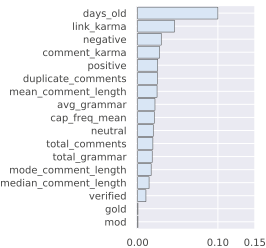

In [13]:
#ensemble importances
I = importances(e.eclf, e.X_train, e.y_train)
plot_importances(I)

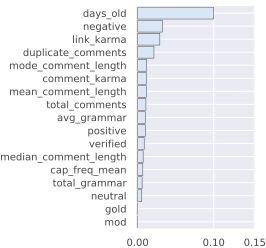

In [15]:
#random forest importances
e.rf.fit(e.X_train, e.y_train)
I = importances(e.rf, e.X_train, e.y_train)
plot_importances(I)

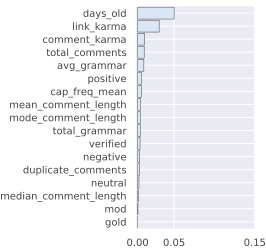

In [17]:
#xgb importances
e.xgb.fit(e.X_train, e.y_train)
I = importances(e.xgb, e.X_train, e.y_train)
plot_importances(I)

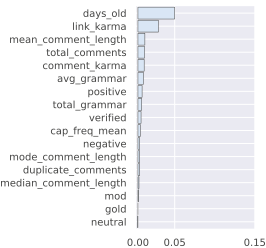

In [18]:
#lgb importances
e.xgb.fit(e.X_train, e.y_train)
I = importances(e.xgb, e.X_train, e.y_train)
plot_importances(I)

In [19]:
e.score()

ROC AUC score: 0.8786135937327595


In [21]:
rf_pred = e.rf_predict(e.X_test)
xgb_pred = e.rf_predict(e.X_test)
lgb_pred = e.rf_predict(e.X_test)

In [22]:
e.model.fit(e.X_train_MNB, e.y_train)
MNB_pred = e.model.predict_proba(e.X_test_MNB)

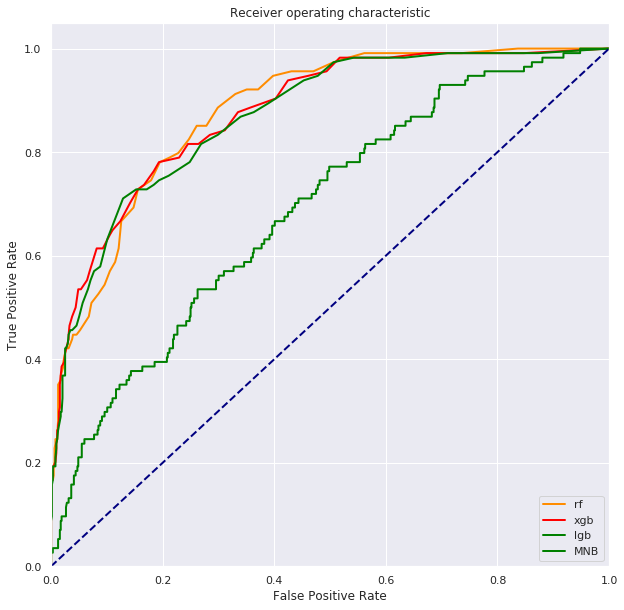

In [25]:
roc_y_test = e.y_test.map(int)

#rf
fpr, tpr, thresholds = roc_curve(roc_y_test, rf_pred, pos_label=1)
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='rf')

#xgb
fpr, tpr, thresholds = roc_curve(roc_y_test, xgb_pred, pos_label=1)
plt.plot(fpr, tpr, color='red',
         lw=2, label='xgb')

#lgb
fpr, tpr, thresholds = roc_curve(roc_y_test, lgb_pred, pos_label=1)
plt.plot(fpr, tpr, color='green',
         lw=2, label='lgb')

#MNB
fpr, tpr, thresholds = roc_curve(roc_y_test, MNB_pred[:,1], pos_label=1)
plt.plot(fpr, tpr, color='green',
         lw=2, label='MNB')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#curve for mix group

In [28]:
tfidf = TfidfVectorizer(
stop_words='english',
min_df=3,  # min count for relevant vocabulary
max_features=5000,  # maximum number of features
strip_accents='unicode',  # replace all accented unicode char by their corresponding ASCII char
analyzer='word',  # features made of words
token_pattern=r'[a-zA-Z]{4,}',  # tokenize only words of 3+ chars
ngram_range=(1, 1),  # features made of a single tokens
use_idf=True,  # enable inverse-document-frequency reweighting
smooth_idf=True,  # prevents zero division for unseen words
sublinear_tf=False)

tfidfed = tfidf.fit_transform(e.X['comments_new'])

In [52]:
for idx, row in enumerate(MNB_pred[:,1]):
    if row >= .15:
        print(idx)

144
339
567


Text(89.18, 0.5, 'predicted label')

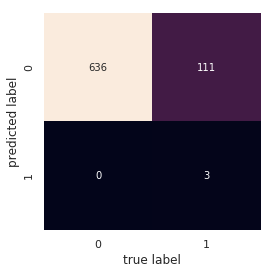

In [51]:
pred = MNB_pred[:,1] > .25
mat = confusion_matrix(e.y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [1]:
e.X_test_MNB.iloc[567]

NameError: name 'e' is not defined

In [60]:
e.y_test.iloc[567]

True

In [63]:
terms = tfidf.get_feature_names()

# vecced = tfidf.transform(X_test)
# sum tfidf frequency of each term through documents
sums = tfidfed.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False)[:50])

            term        rank
2347        just  443.655475
2511        like  385.447024
2119       https  217.867202
1881        good  212.656744
3114      people  199.017400
4451      thanks  197.730317
2396        know  194.579865
4469       think  190.771900
3499      really  184.603704
4500        time  178.289552
4820        want  147.818760
1797        game  144.519402
2627        make  128.496773
4449       thank  127.938239
4339        sure  121.844193
2879        need  117.974902
3697       right  116.135053
1875       going  114.022018
4558       trade  108.977332
3529      reddit  108.815529
1914       great  107.342198
2592        love  107.021637
4979        yeah  102.968429
4938        work  101.960332
1210        didn   96.634962
3309      pretty   95.712411
378       better   93.689803
2118        http   90.213341
2573        look   87.958899
4098       sorry   87.656920
1803       games   85.991146
2263  interested   85.830850
4467       thing   84.608378
44      actual

In [65]:
probs = e.eclf.predict_proba(e.X_test)[:,1]

Text(89.18, 0.5, 'predicted label')

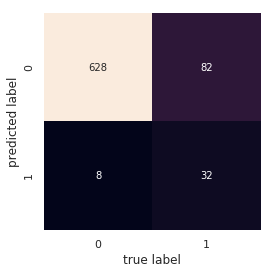

In [72]:
pred = probs >= .50
mat = confusion_matrix(e.y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [87]:
pred = probs >= .15
accuracies = accuracy_score(e.y_test, pred)
precisions = precision_score(e.y_test, pred)
recalls = recall_score(e.y_test, pred)

print("accuracy:", np.average(accuracies))
print("precision:", np.average(precisions))
print("recall:", np.average(recalls))

accuracy: 0.8026666666666666
precision: 0.415
recall: 0.7280701754385965


Text(89.18, 0.5, 'predicted label')

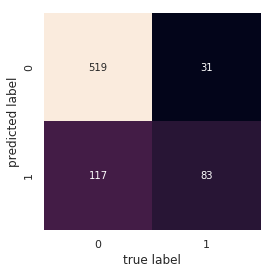

In [86]:
pred = probs >= .15
mat = confusion_matrix(e.y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.externals import joblib
CAT = ['rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space']
# Just grab the training set:
newsgroups_train = fetch_20newsgroups(subset='train', categories=cat)

# Create our processing pipeline and train it
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB(alpha=0.01))])
text_clf.fit(newsgroups_train.data, newsgroups_train.target)

# Now we save it to a pickle
joblib.dump(text_clf, 'pipeline.pkl')

In [91]:
from sklearn.externals import joblib
# e.eclf
# e.model
joblib.dump(e.eclf, 'eclf.joblib')
joblib.dump(e.model, 'pipeline.joblib')

['pipeline.pkl']

In [3]:
ls 

concat.py            hs_err_pid29690.log  model.py           train.mp3
data/                hs_err_pid30880.log  naive_bayes.ipynb  user.py
EDA.ipynb            legacy.py            nb.ipynb           uslapi/
ensemble.py          legacy.txt           pics/              usl.py
good_model.ipynb     merged_grammar.csv   __pycache__/       watch_clf.joblib
grammar.py           merged_grammar.pkl   README.md          weird/
hs_err_pid27604.log  mix_df.py            reddit.py
hs_err_pid28748.log  model.ipynb          thurs.ipynb
